# 1. Preparation

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RUN_LOCALLY = False

if RUN_LOCALLY:
    project_path = os.getcwd()
else:
    from google.colab import drive
    drive.mount("/content/drive")
    project_path = "/content/drive/MyDrive/Colab Notebooks/Course-NUS-cs5242-Neural Network and Deep Learning/final_project"

running_res_folder = project_path + "/Running_result"
if not os.path.exists(running_res_folder):
    raise Exception("The `Running_result` sub folder does not exist.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Train and Validation Loss and Rouge Score

In [70]:
tt_loss = pd.read_csv(running_res_folder + "/total_train_loss.csv")
tv_loss = pd.read_csv(running_res_folder + "/total_val_loss.csv")

train_rouge = pd.read_csv(running_res_folder + "/total_train_rouge.csv")
val_rouge = pd.read_csv(running_res_folder + "/total_val_rouge.csv")

log_loss = pd.read_csv(running_res_folder + "/log_loss.csv")
log_rouge = pd.read_csv(running_res_folder + "/log_rouges.csv")

In [ ]:
tt_loss['epoch_mean'] = tt_loss.mean(axis=1)
tt_loss

tv_loss['epoch_mean'] = tv_loss.mean(axis=1)
tv_loss


In [72]:
val_rouge

,Unnamed: 0,0,1,2
0,0,0.202456,0.013241,0.130311
1,1,0.195531,0.013052,0.125549
2,2,0.200878,0.013265,0.129309
3,3,0.192253,0.012716,0.125831
4,4,0.202512,0.015765,0.132391
5,5,0.194778,0.012583,0.125972
6,6,0.199047,0.011838,0.129646
7,7,0.202001,0.016738,0.132724
8,8,0.204678,0.015242,0.136776
9,9,0.196042,0.019384,0.129315


In [73]:
log_loss

,Unnamed: 0,train_loss,val_loss
0,0,3.4692,2.6045
1,1,2.7633,2.4731
2,2,2.6123,2.9215
3,3,2.6445,2.4178
4,4,2.5045,2.3490
5,5,2.3663,2.4106
6,6,2.3512,2.4272
7,7,2.2645,2.2991
8,8,2.2048,2.2871
9,9,2.1591,2.2996


In [74]:
log_rouge

,Unnamed: 0,rouge1,rouge2,rougeL
0,0,47.969908,22.089781,39.900176
1,1,48.821135,22.844477,40.684046
2,2,49.043177,23.089003,40.863839
3,3,49.172655,23.185718,41.073520
4,4,49.349180,23.316792,41.186798
5,5,49.630199,23.612541,41.497244
6,6,49.515275,23.594874,41.456874
7,7,49.593700,23.533037,41.580852
8,8,49.538934,23.382598,41.445517
9,9,49.193331,23.287622,41.218475


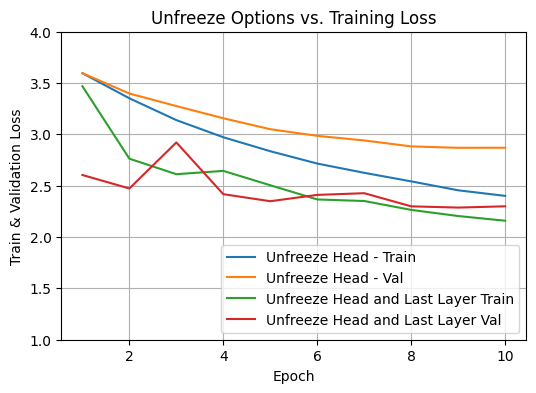

In [94]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, tt_loss.shape[0]+1), tt_loss['epoch_mean'])
plt.plot(np.arange(1, tv_loss.shape[0]+1), tv_loss['epoch_mean'])
plt.plot(np.arange(1, log_loss.shape[0]+1), log_loss['train_loss'])
plt.plot(np.arange(1, log_loss.shape[0]+1), log_loss['val_loss'])
plt.ylabel('Train & Validation Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.ylim((1, 4))
plt.legend(["Unfreeze Head - Train", "Unfreeze Head - Val", "Unfreeze Head and Last Layer Train", "Unfreeze Head and Last Layer Val"], loc ="lower right")
plt.title('Unfreeze Options vs. Training Loss')
plt.show()

In [77]:
val_rouge.columns = ['epoch', 'rouge1', 'rouge2', 'rougeL']
val_rouge


,epoch,rouge1,rouge2,rougeL
0,0,0.202456,0.013241,0.130311
1,1,0.195531,0.013052,0.125549
2,2,0.200878,0.013265,0.129309
3,3,0.192253,0.012716,0.125831
4,4,0.202512,0.015765,0.132391
5,5,0.194778,0.012583,0.125972
6,6,0.199047,0.011838,0.129646
7,7,0.202001,0.016738,0.132724
8,8,0.204678,0.015242,0.136776
9,9,0.196042,0.019384,0.129315


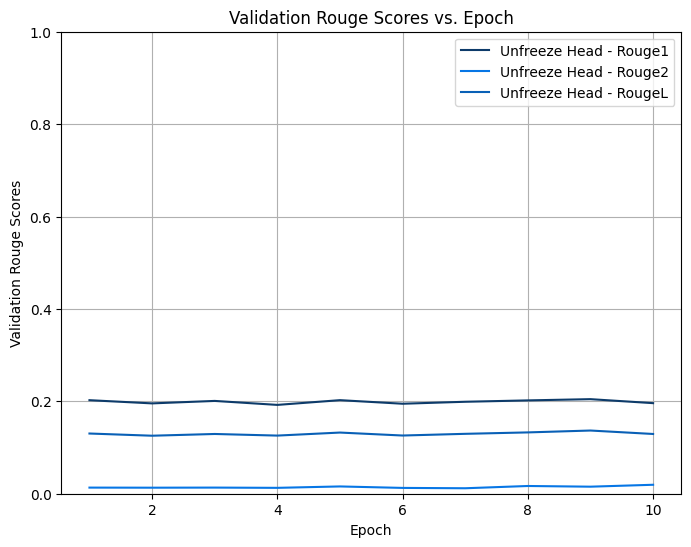

In [92]:
plt.figure(figsize=(8,6))
# plt.plot(np.arange(1, log_rouge.shape[0]+1), log_rouge['rouge1'])
# plt.plot(np.arange(1, log_rouge.shape[0]+1), log_rouge['rouge2'])
# plt.plot(np.arange(1, log_rouge.shape[0]+1), log_rouge['rougeL'])
plt.plot(np.arange(1, val_rouge.shape[0]+1), val_rouge['rouge1'], color = "#0D3B6A")
plt.plot(np.arange(1, val_rouge.shape[0]+1), val_rouge['rouge2'], color = "#0776E5")
plt.plot(np.arange(1, val_rouge.shape[0]+1), val_rouge['rougeL'], color= "#0960B6")
plt.ylabel('Validation Rouge Scores')
plt.xlabel('Epoch')
plt.grid(True)
plt.ylim((0, 1))
plt.legend(["Unfreeze Head - Rouge1", "Unfreeze Head - Rouge2", "Unfreeze Head - RougeL"], loc ="upper right")
plt.title('Validation Rouge Scores vs. Epoch')
plt.show()


### In case you need to convert the log file (model_summarizer/logs/) into dataframe format

In [ ]:
# In case you need to convert the log file from model_summarizer/logs/ into dataframe format
# import os
# import pandas as pd
# file_name = os.getcwd() + "/logs/metrics_log-lrscheduler.txt"

# train_losses = []
# val_losses = []
# line_index = 0
# total_rouge1, total_rouge2, total_rougeL = [], [], []
# for line in open(file_name):

#     items = line.split()
#     print(items)
#     train_losses.append(items[6])
#     val_losses.append(items[9])
#     total_rouge1.append(items[11][1:])
#     total_rouge2.append(items[12])
#     total_rougeL.append(items[13][:-1])

#     line_index += 1

#     if line_index >= 10:
#         break

# loss = pd.DataFrame({"train_loss": train_losses, "val_loss": val_losses})
# display(loss)

# rouges = pd.DataFrame({"rouge1": total_rouge1, "rouge2": total_rouge2, "rougeL": total_rougeL})
# display(rouges)